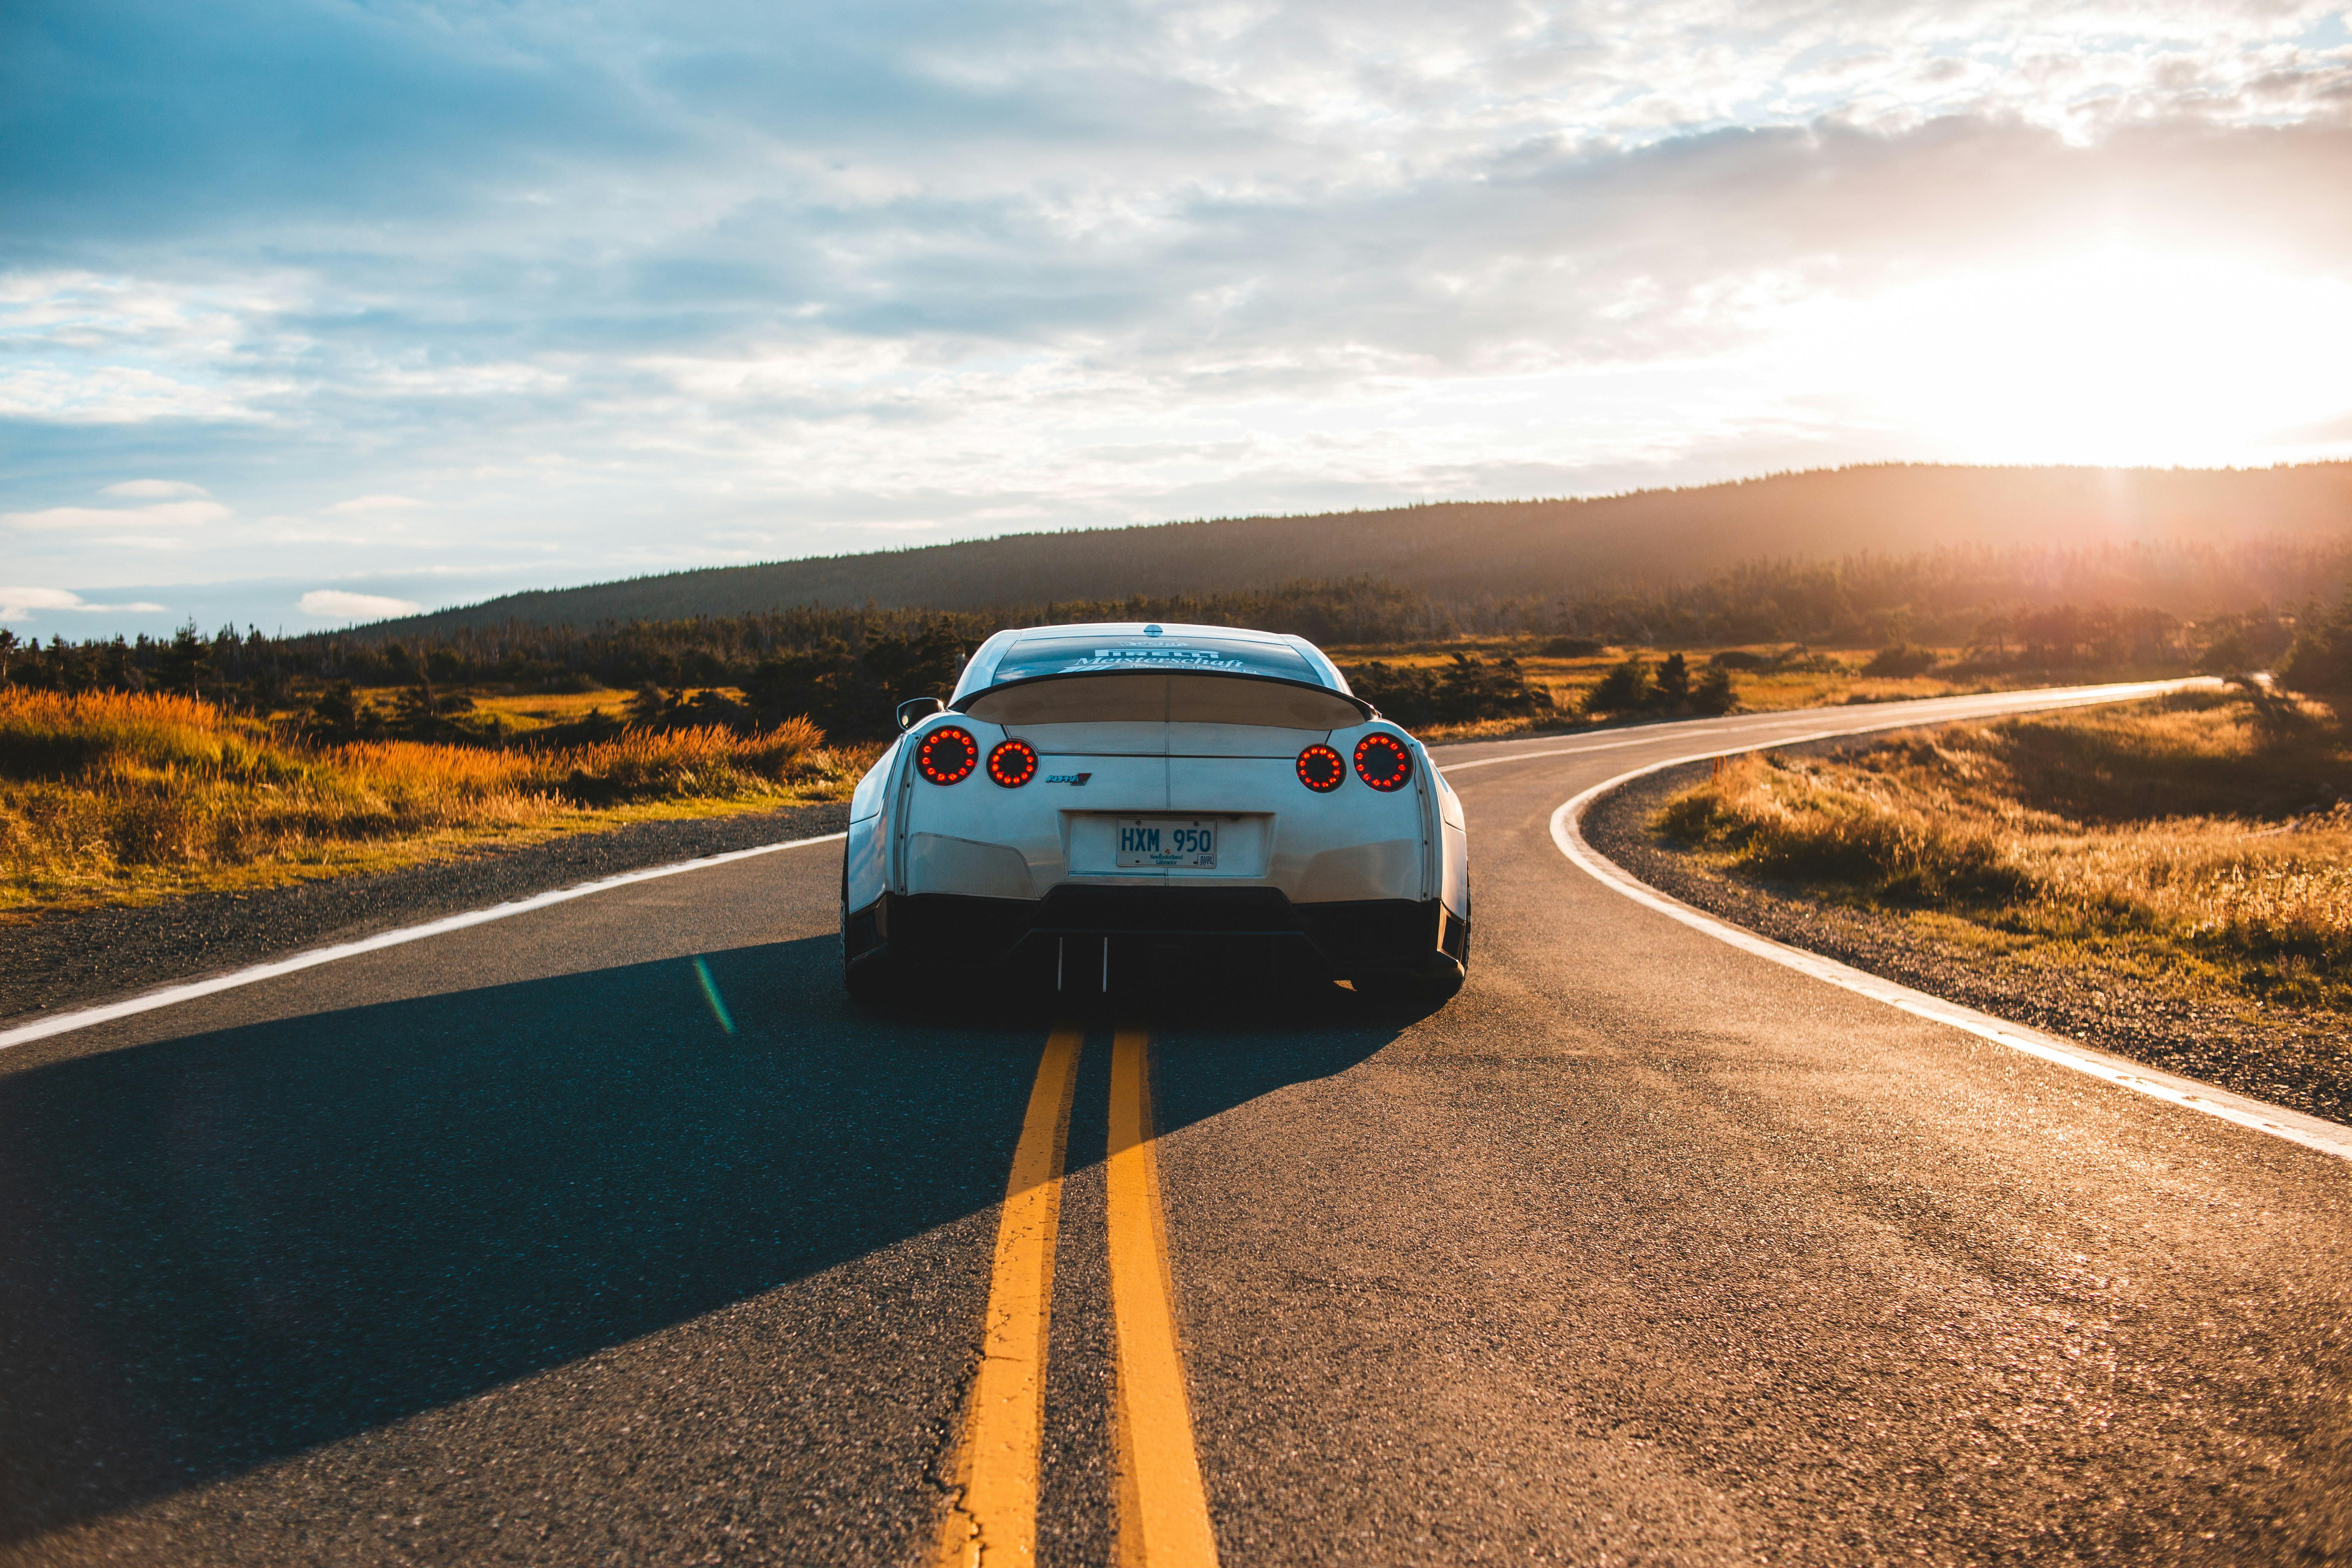

# Data Exploration & Cleansing

**In this section, am doing data exploration and cleansing and it shown in each step**

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
scp = pd.read_csv("SportCarPrice.csv")

In [3]:
scp.

Car Make Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
0         Porsche       911  2022               3        379            331   
1     Lamborghini   Huracan  2021             5.2        630            443   
2         Ferrari   488 GTB  2022             3.9        661            561   
3            Audi        R8  2022             5.2        562            406   
4         McLaren      720S  2021               4        710            568   
...           ...       ...   ...             ...        ...            ...   
1002   Koenigsegg     Jesko  2022               5       1280           1106   
1003        Lotus     Evija  2021  Electric Motor       1972           1254   
1004      McLaren     Senna  2021               4        789            590   
1005       Pagani    Huayra  2021               6        764            738   
1006        Rimac    Nevera  2021  Electric Motor       1888           1696   

     0-60 MPH Time (seconds) Price (in USD)  
0                          4        101,200  
1                        2.8        274,390  
2                          3        333,750  
3                        3.2        142,700  
4                        2.7        298,000  
...                      ...            ...  
1002                     2.5      3,000,000  
1003                       2      2,000,000  
1004                     2.7      1,000,000  
1005                       3      2,600,000  
1006                    1.85      2,400,000  

[1007 rows x 8 columns]

Here i can see there the following:
<ol>
<li>There like 10 null values in Engine Size (L).</li>
<li>there is also 3 nulls in Torque (lb-ft).</li>
    <li>we can see that most of the numeric features is a object data type so we need to change them.</li>
</ol>

In [26]:
scp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [27]:
scp.isna().sum()

Car Make                    0
Car Model                   0
Year                        0
Engine Size (L)            10
Horsepower                  0
Torque (lb-ft)              3
0-60 MPH Time (seconds)     0
Price (in USD)              0
dtype: int64

In [28]:
scp[scp["Engine Size (L)"].isna()]

Car Make       Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
168    Rimac           C_Two  2022             NaN       1914           1696   
171    Tesla   Model S Plaid  2021             NaN       1020           1050   
222  Porsche  Taycan Turbo S  2021             NaN        750            774   
247    Tesla   Model S Plaid  2022             NaN       1020           1050   
387    Rimac           C_Two  2022             NaN       1888           1696   
389    Tesla        Roadster  2022             NaN     10000+              0   
686    Rimac           C_Two  2022             NaN       1914           1696   
697    Lotus           Evija  2022             NaN       1972           1254   
752  Porsche          Taycan  2022             NaN        469            479   
916    Tesla        Roadster  2022             NaN    10,000+            NaN   

    0-60 MPH Time (seconds) Price (in USD)  
168                     1.9      2,400,000  
171                    1.98        131,190  
222                     2.6        185,000  
247                     1.9        131,190  
387                     1.8      2,400,000  
389                     1.9        200,000  
686                    1.85      2,400,000  
697                     2.5      2,700,000  
752                     3.8         79,900  
916                     1.9        200,000

Here we changed the numeric values into string (Gas, Electric).

In [29]:
scp["Engine Size (L)"] = np.where((scp["Car Make"] == "Rimac") | (scp["Car Make"] == "Tesla"), "Electric","Gas") 

In [30]:
scp["Engine Size (L)"].value_counts()

Engine Size (L)
Gas         974
Electric     33
Name: count, dtype: int64

In [31]:
scp.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             3
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

In [32]:
scp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          1007 non-null   object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [33]:
scp[scp["Torque (lb-ft)"].isna()]

Car Make      Car Model  Year Engine Size (L) Horsepower Torque (lb-ft)  \
642     Tesla  Model S Plaid  2021        Electric       1020            NaN   
878  Maserati    GranTurismo  2021             Gas        550            NaN   
916     Tesla       Roadster  2022        Electric    10,000+            NaN   

    0-60 MPH Time (seconds) Price (in USD)  
642                     1.9        139,990  
878                     2.8        200,000  
916                     1.9        200,000

Removing the string characters from values and re-type them again.

In [34]:
scp["Horsepower"] = scp["Horsepower"].str.replace("\+", "", regex=True).str.replace("\,", "", regex=True).astype(np.int64)

scp["Torque (lb-ft)"] = scp["Torque (lb-ft)"].str.replace('\-', lambda x: np.nan, regex= True).str.replace("\+","", regex= True).str.replace("\,", "",regex= True)
scp.loc[scp['Torque (lb-ft)'] == "0", 'Torque (lb-ft)'] = scp.loc[scp['Torque (lb-ft)'] == "0", 'Horsepower']
scp['Torque (lb-ft)'].fillna(scp['Horsepower'], inplace=True)
scp["Torque (lb-ft)"] = scp["Torque (lb-ft)"].astype(np.int64)

scp["0-60 MPH Time (seconds)"] = scp["0-60 MPH Time (seconds)"].str.replace("\<","", regex = True).astype(float)

scp["Price (in USD)"] = scp["Price (in USD)"].str.replace(",","", regex = True).astype(np.int64)

In [35]:
scp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   object 
 1   Car Model                1007 non-null   object 
 2   Year                     1007 non-null   int64  
 3   Engine Size (L)          1007 non-null   object 
 4   Horsepower               1007 non-null   int64  
 5   Torque (lb-ft)           1007 non-null   int64  
 6   0-60 MPH Time (seconds)  1007 non-null   float64
 7   Price (in USD)           1007 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 63.1+ KB


We can see that there unreasonable number at the max for each column so we need to remove them.

In [ ]:
scp.describe()

Year    Horsepower
count  1007.000000   1007.000000
mean   2021.201589    657.984111
std       2.019802    593.017842
min    1965.000000    181.000000
25%    2021.000000    454.000000
50%    2021.000000    591.000000
75%    2022.000000    708.500000
max    2023.000000  10000.000000

# Detecting outliers & Dealing with it:

In [ ]:
num_features = ["Year", "Horsepower", "Torque (lb-ft)", "0-60 MPH Time (seconds)", "Price (in USD)"]
fixed = []

In [ ]:
def outlier_detect(df, feature):
    for i in num_features:
        Q1 = df[i].quantile(.25)
        Q3 = df[i].quantile(.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5* IQR
        lower_bound = math.floor(lower_bound)
        upper_bound = math.floor(upper_bound)
        fixed.append((lower_bound, upper_bound))
    return fixed

In [ ]:
outlier_detect(scp, num_features)

[(2019, 2023), (72, 1090), (108, 902), (1, 5), (-195500, 517300)]

In [ ]:
fixed

[(2019, 2023), (72, 1090), (108, 902), (1, 5), (-195500, 517300)]

In [ ]:
for feature, value in zip(num_features, fixed):
    lower_bound, upper_bound = value
    scp[feature] = np.where(scp[feature] > upper_bound, upper_bound,
                            np.where(scp[feature] < lower_bound, lower_bound, scp[feature]))

In [ ]:
scp.describe()

Year   Horsepower  Torque (lb-ft)  0-60 MPH Time (seconds)  \
count  1007.000000  1007.000000     1007.000000              1007.000000   
mean   2021.318769   599.586892      520.475670                 3.502383   
std       0.631099   200.980277      164.748489                 0.751695   
min    2019.000000   181.000000      151.000000                 1.800000   
25%    2021.000000   454.000000      406.000000                 2.900000   
50%    2021.000000   591.000000      509.000000                 3.500000   
75%    2022.000000   708.500000      604.500000                 4.000000   
max    2023.000000  1090.000000      902.000000                 5.000000   

       Price (in USD)  
count     1007.000000  
mean    198519.007944  
std     159093.859974  
min      25000.000000  
25%      71800.000000  
50%     140000.000000  
75%     250000.000000  
max     517300.000000

In [ ]:
scp.isna().sum()

Car Make                   0
Car Model                  0
Year                       0
Engine Size (L)            0
Horsepower                 0
Torque (lb-ft)             0
0-60 MPH Time (seconds)    0
Price (in USD)             0
dtype: int64

# All set

We can start our visualization, since we knew the target is price we have to see some stuff of the data:
<ol>
<li>The correlation between the variables.</li>
    </ol>

In [ ]:
scp.corr()

Year  Horsepower  Torque (lb-ft)  \
Year                     1.000000   -0.004486        0.031811   
Horsepower              -0.004486    1.000000        0.906667   
Torque (lb-ft)           0.031811    0.906667        1.000000   
0-60 MPH Time (seconds)  0.007868   -0.848683       -0.767201   
Price (in USD)          -0.090899    0.756578        0.581163   

                         0-60 MPH Time (seconds)  Price (in USD)  
Year                                    0.007868       -0.090899  
Horsepower                             -0.848683        0.756578  
Torque (lb-ft)                         -0.767201        0.581163  
0-60 MPH Time (seconds)                 1.000000       -0.681065  
Price (in USD)                         -0.681065        1.000000

from the table above, we can know there a high correlation between "Torque" and "HorsePower" so we dont need to visualize them both.

also we can see same as price with them both.

Text(0, 0.5, 'Horsepower')

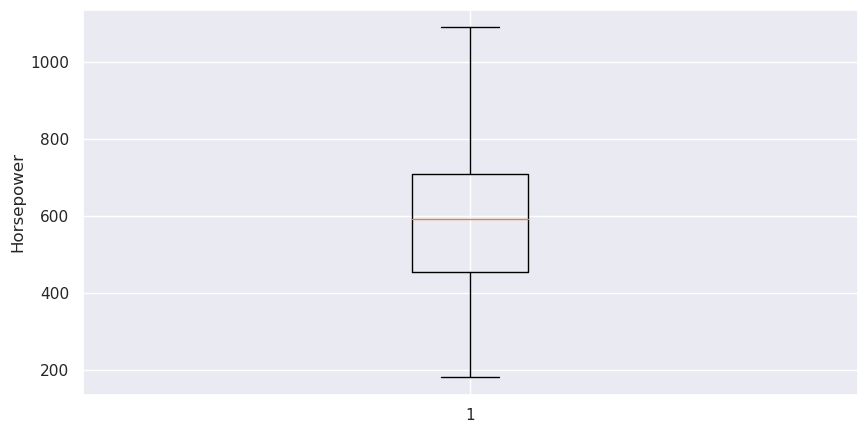

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
plt.boxplot(scp["Horsepower"])
plt.ylabel("Horsepower")

<Axes: xlabel='Horsepower', ylabel='Price (in USD)'>

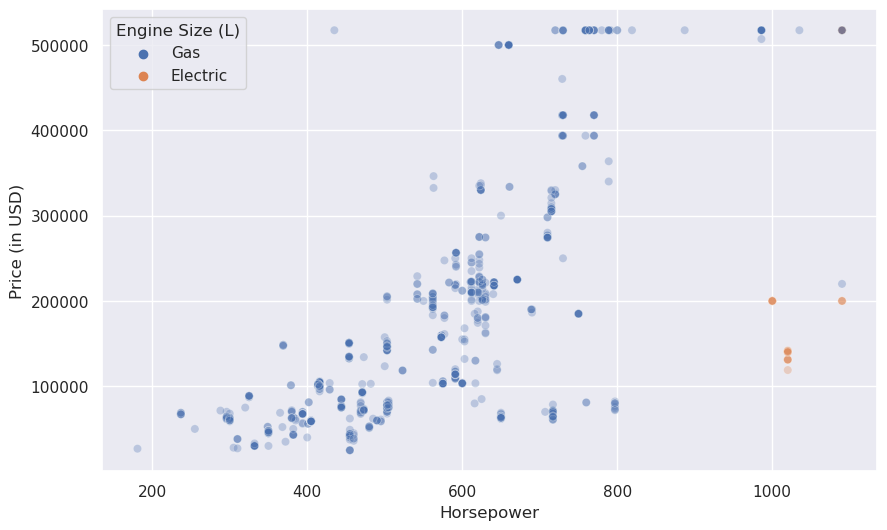

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(data=scp,
                x="Horsepower",
                y = "Price (in USD)", 
                hue = "Engine Size (L)", alpha = 0.3
               )

<Axes: xlabel='Engine Size (L)', ylabel='Price (in USD)'>

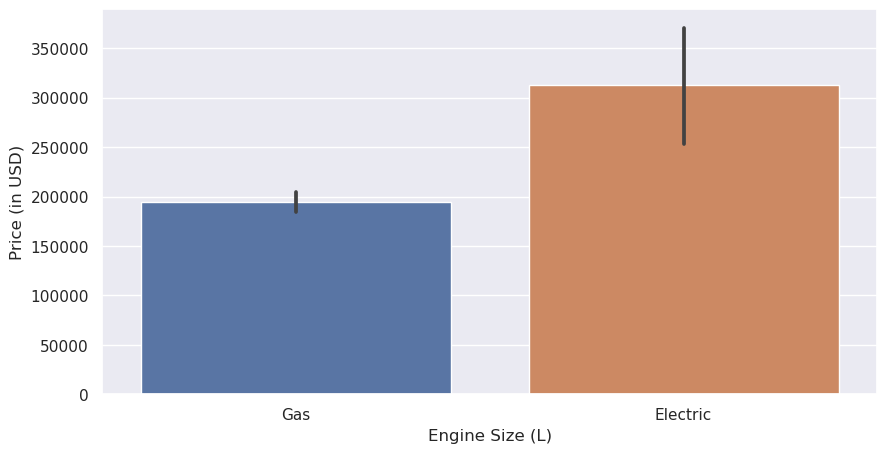

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.set_theme(style="darkgrid")
sns.barplot(
    data = scp,
    x = "Engine Size (L)",
    y = "Price (in USD)"
)

<Axes: >

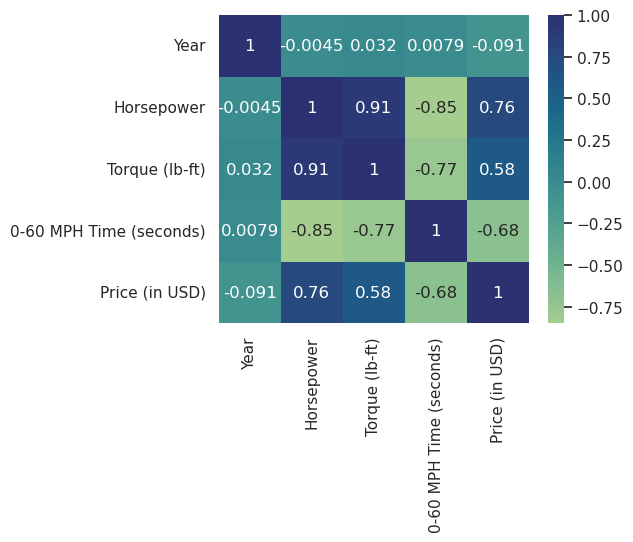

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(scp.corr(), annot=True, cmap = "crest")

# Data Preperation
**Includes splitting the data set into training and testing sets.**

In [ ]:
scp

Car Make Car Model  Year Engine Size (L)  Horsepower  Torque (lb-ft)  \
0         Porsche       911  2022             Gas         379             331   
1     Lamborghini   Huracan  2021             Gas         630             443   
2         Ferrari   488 GTB  2022             Gas         661             561   
3            Audi        R8  2022             Gas         562             406   
4         McLaren      720S  2021             Gas         710             568   
...           ...       ...   ...             ...         ...             ...   
1002   Koenigsegg     Jesko  2022             Gas        1090             902   
1003        Lotus     Evija  2021             Gas        1090             902   
1004      McLaren     Senna  2021             Gas         789             590   
1005       Pagani    Huayra  2021             Gas         764             738   
1006        Rimac    Nevera  2021        Electric        1090             902   

      0-60 MPH Time (seconds)  Price (in USD)  
0                        4.00          101200  
1                        2.80          274390  
2                        3.00          333750  
3                        3.20          142700  
4                        2.70          298000  
...                       ...             ...  
1002                     2.50          517300  
1003                     2.00          517300  
1004                     2.70          517300  
1005                     3.00          517300  
1006                     1.85          517300  

[1007 rows x 8 columns]

In [ ]:
scp["Year"].unique()

array([2022, 2021, 2019, 2020, 2023])

In [ ]:
Engine_Size_map = {"Gas":0, "Electric":1}
Year = {2019:0, 2020:1, 2021:2, 2022:3, 2023:4}

scp["Engine Size (L)"] = scp["Engine Size (L)"].map(Engine_Size_map)
scp["Year"] = scp.Year.map(Year)

In [ ]:
Car_Make = pd.get_dummies(scp["Car Make"], drop_first=True)
scp = scp.drop("Car Make", axis = 1)
scp = pd.concat([scp, Car_Make], axis = 1)

In [ ]:
Car_Model = pd.get_dummies(scp["Car Model"], drop_first=True)
scp = scp.drop("Car Model", axis = 1)
scp = pd.concat([scp, Car_Model], axis = 1)

In [ ]:
x = scp.drop(columns=["Price (in USD)", "Torque (lb-ft)"])
y = scp["Price (in USD)"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.fit_transform(np.array(y_train).reshape(-1,1))
y_test = sc_y.transform(np.array(y_test).reshape(-1,1))

In [ ]:
x_train

array([[-0.5306813 , -0.20346291,  0.54096676, ..., -0.03526728,
        -0.03526728, -0.06116084],
       [ 1.0753279 , -0.20346291, -1.11049681, ..., -0.03526728,
        -0.03526728, -0.06116084],
       [ 1.0753279 , -0.20346291, -1.03720701, ..., -0.03526728,
        -0.03526728, -0.06116084],
       ...,
       [ 1.0753279 , -0.20346291, -0.66098602, ..., -0.03526728,
        -0.03526728, -0.06116084],
       [-0.5306813 , -0.20346291, -0.93948727, ..., -0.03526728,
        -0.03526728, -0.06116084],
       [ 1.0753279 , -0.20346291, -0.21636121, ..., -0.03526728,
        -0.03526728, -0.06116084]])

## Linear Regression model

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
yLr_preds = lr.predict(x_test)

In [ ]:
print("R2 score:", r2_score(y_test, yLr_preds))
print("----------------------------------------")
print("RMSE test :", mean_squared_error(y_test, yLr_preds, squared= False))
print("----------------------------------------")
print("RMSE train :", mean_squared_error(y_train, lr.predict(x_train), squared=False))
print("----------------------------------------")
print("MAE:", mean_absolute_error(y_test, yLr_preds))
print("----------------------------------------")

R2 score: -4.315182939958297e+24
----------------------------------------
RMSE test : 1922506524413.9026
----------------------------------------
RMSE train : 0.061644297813527475
----------------------------------------
MAE: 529872522842.7609
----------------------------------------


## RandomForest model

In [ ]:
rfr = RandomForestRegressor(n_estimators = 1000, random_state= 1, n_jobs=-1)# n_estimators is the number of trees to build
                                                               # more n_estimators more accurate results
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=1)

In [ ]:
yrfr_pred = rfr.predict(x_test)

In [ ]:
print("R2 score:", r2_score(y_test, yrfr_pred))
print("----------------------------------------")
print("RMSE test set: ", mean_squared_error(y_test, yrfr_pred, squared = False))
print("----------------------------------------")
print("RMSE train set: ",mean_squared_error(y_train, rfr.predict(x_train), squared=False))
print("----------------------------------------")
print("MAE:", mean_absolute_error(y_test, yrfr_pred))

R2 score: 0.9926243070255142
----------------------------------------
RMSE test set:  0.07948215458735712
----------------------------------------
RMSE train set:  0.07411415489651747
----------------------------------------
MAE: 0.03726471843877237


# Support Vector Regression model

In [ ]:
svr = SVR(kernel="linear")
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [ ]:
ySVR_pred = svr.predict(x_test)

In [ ]:
print("R2 score:", r2_score(y_test, ySVR_pred))
print("----------------------------------------")
print("RMSE test:", mean_squared_error(y_test, ySVR_pred, squared= False))
print("----------------------------------------")
print("RMSE train:", mean_squared_error(y_train, svr.predict(x_train), squared=False))
print("----------------------------------------")
print("MAE:", mean_absolute_error(y_test, ySVR_pred))

R2 score: 0.9705404827014683
----------------------------------------
RMSE test: 0.15884773606720753
----------------------------------------
RMSE train: 0.09504897574465189
----------------------------------------
MAE: 0.10309205457242435


# Evaluation using Cross-Validation 

In [ ]:
models = []
models.append(("Linear Regression: ", LinearRegression()))
models.append(("RandomForest Regression: ", RandomForestRegressor(n_estimators = 1000, random_state= 0)))
models.append(("SupportVector Regression: ", SVR(kernel="linear")))
models

[('Linear Regression: ', LinearRegression()),
 ('RandomForest Regression: ',
  RandomForestRegressor(n_estimators=1000, random_state=0)),
 ('SupportVector Regression: ', SVR(kernel='linear'))]

In [ ]:
results = dict()
scores = []
for name, model in models:
    cv_results = -1 * cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv= 10)
    scores.append((name, cv_results))
    results[name] = (cv_results.mean(), cv_results.std())

In [ ]:
for name, score in scores:
    print(name,score)
    print("----------------------------------------")

Linear Regression:  [1.43582496e+26 2.14616698e+26 7.86626115e+25 6.43695509e+25
 1.73777049e+25 4.60421273e+25 2.13816771e+26 2.88026442e+26
 2.81189771e+26 1.09641108e+25]
----------------------------------------
RandomForest Regression:  [0.02270005 0.00838015 0.01641583 0.01925719 0.02857504 0.01120685
 0.02826142 0.11455431 0.04990281 0.01828334]
----------------------------------------
SupportVector Regression:  [0.05958598 0.1267102  0.0562819  0.02481912 0.05449586 0.11321668
 0.03158077 0.15395558 0.03888776 0.02886822]
----------------------------------------


### Final score 

In [ ]:
print("name                  result.mean()       result.std()")
print("----                  -------------       ------------")
for key, value in results.items():
    print(key, value)
    print("---------------------")

name                  result.mean()       result.std()
----                  -------------       ------------
Linear Regression:  (1.3586482840619586e+26, 1.0134179499926362e+26)
---------------------
RandomForest Regression:  (0.031753699279902556, 0.02971693117630178)
---------------------
SupportVector Regression:  (0.06884020750509572, 0.043396978574053495)
---------------------


the "training accuracy" of the model is denoted by **orange dashed line**, the "validation accuracy" of the model is denoted by the **blue line**, and the "desired model accuracy" is denoted by the **black dashed line**.

# Overfitting:
High Variance Models (Overfitting): The plot on the right side represents a model that has large gap between training and validation accuracy. The training accuracy is larger than the validation accuracy. These models suffer from high variance (overfitting). You may notice that as the training samples size increases, the training accuracy decreases and validation accuracy increases.


A high error rate in the testing data indicates overfitting. One method of testing for overfitting is given below.
K-fold cross-validation
Cross-validation is one of the testing methods used in practice. In this method, data scientists divide the training set into K equally sized subsets or sample sets called folds. The training process consists of a series of iterations. During each iteration, the steps are:
1.    Keep one subset as the validation data and train the machine learning model on the remaining K-1 subsets.
2.    Observe how the model performs on the validation sample.
3.    Score model performance based on output data quality.

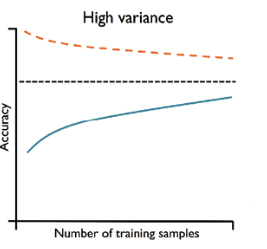

# Underfitting:
High Bias Models (Underfitting): The plot on the left side represents the model having both low training and validation accuracy. This indicates that that the model under fits the training data and thus, is the case of high bias. You may notice that as the training samples size increases, the training accuracy decreases and validation accuracy increases. However, the validation accuracy is far from the desired accuracy.

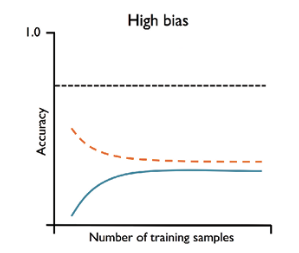

# Learning Curves 

### Linear regression

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    lr, x_train, y_train, cv=10, n_jobs= -1)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

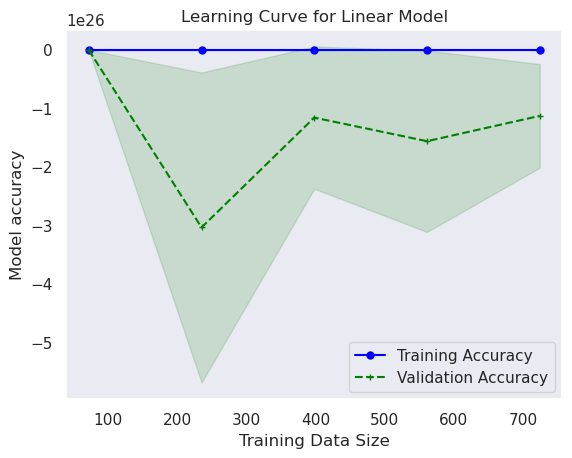

In [ ]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for Linear Model')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### RandomForestRegerssor

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    rfr, x_train, y_train, cv=10)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

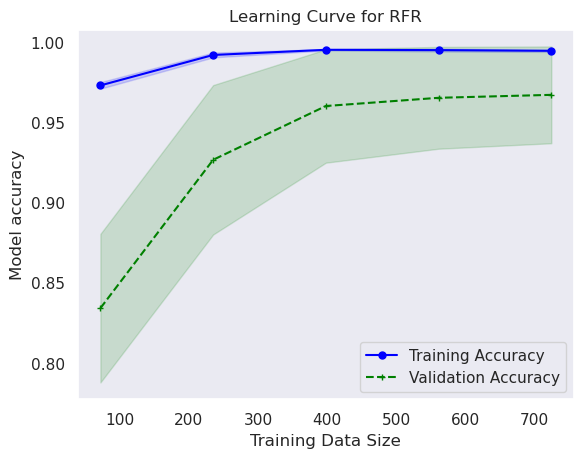

In [ ]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for RFR')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Support vector machine

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    svr, x_train, y_train, cv=10)

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

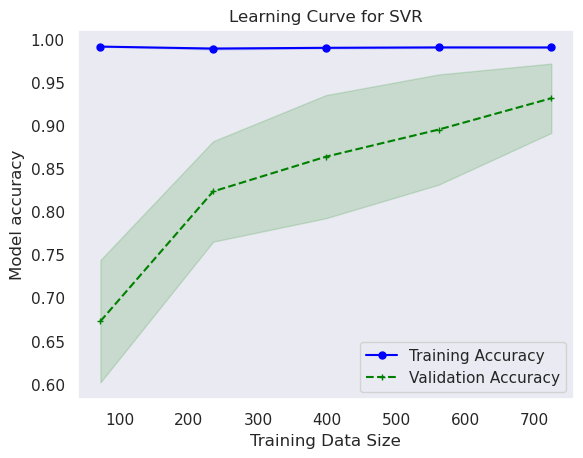

In [ ]:
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve for SVR')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

At the end I can clearfy that the random forest regression model results better than the linear model or support vector model